In [33]:
import glob
import matplotlib.pyplot as plt
from lightkurve import KeplerTargetPixelFile
from pyke import kepio, kepmsg, kepplot
from copy import copy
from lightkurve import KeplerTargetPixelFile
import glob
from copy import copy
from pyke import kepio, kepmsg, kepplot
import matplotlib.pyplot as plt
import lightkurve
import numpy as np
import warnings
from astropy.visualization import (PercentileInterval, ImageNormalize,
                                   SqrtStretch, LinearStretch)
from matplotlib.colors import LogNorm
import sys
from matplotlib import patches
from astropy.visualization import ZScaleInterval
import matplotlib.cm as cm


In [34]:
tpffilelist=glob.glob('attilafiles/ktwo*212688460*lpd-targ.fits')
mfilelist=[each[:-5]+'.kepmask' for each in tpffilelist]

In [35]:
szelsoerteklista=[1148,1436,3068,2864,2074]

##########################################################################################
attilafiles/ktwo212688460-c06_lpd-targ.fits
frame=1148
Szélső érték


/home/pal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in log


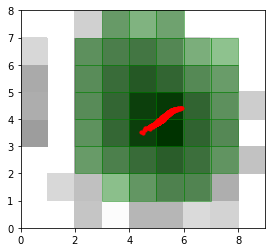

frame=1436
Szélső érték


/home/pal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in log


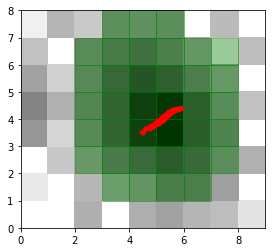

frame=3068
Szélső érték


/home/pal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in log


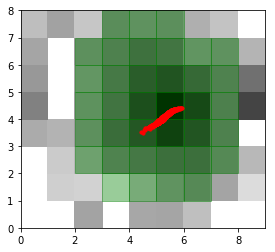

frame=2864
Szélső érték


/home/pal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in log


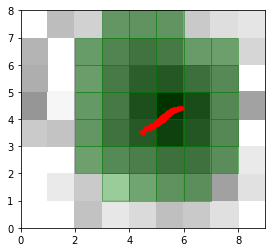

frame=2074
Középső érték


/home/pal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in log


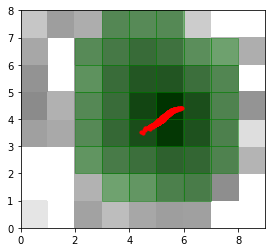

In [36]:
for i, eachtpf in enumerate(tpffilelist):
    
    #if True:
    if i<1:
    
        print('##########################################################################################')
        print(eachtpf)

        
        tpffile=eachtpf
        maskfile=mfilelist[i]

        logfile='thisislogfile'

        kepid, channel, skygroup, module, output, quarter, season, \
        ra, dec, column, row, kepmag, xdim, ydim, pixels = \
        kepio.readTPF(tpffile, 'FLUX', logfile, verbose=True)

        ymin = copy(row)
        ymax = ymin + ydim
        xmin = copy(column)
        xmax = xmin + xdim

        lines = kepio.openascii(maskfile, 'r', None, False)
        for line in lines:
            mask = []
            work = line.strip().split('|')
            y0 = int(work[3])
            x0 = int(work[4])
            work = work[5].split(';')
            for i in range(len(work)):
                n = int(work[i].split(',')[0]) + y0
                m = int(work[i].split(',')[1]) + x0
                mask.append(str(m) + ',' + str(n))

        xcords=[int(each.split(',')[0]) for each in mask]
        ycords=[int(each.split(',')[1]) for each in mask]

        newy=[each-ymin for each in ycords]
        newx=[each-xmin for each in xcords]

        tpf=lightkurve.targetpixelfile.KeplerTargetPixelFile(tpffile)

        inrangeindices=[]
        for ithcord, xcord in enumerate(xcords):
            if xcord>xmin and xcord<xmax:
                if ycords[ithcord]>ymin and ycords[ithcord]<ymax:
                    inrangeindices.append(ithcord)

        newxcords=np.asarray(xcords)[inrangeindices]
        newycords=np.asarray(ycords)[inrangeindices]

        newxcords=[each-xmin for each in newxcords]
        newycords=[each-ymin for each in newycords]            

        grid=np.zeros(tpf.flux[0].shape,dtype=int)

        for index, each in enumerate(newxcords):
            grid[newycords[index]][each]=1



        for eachframe in szelsoerteklista:

            print('frame='+str(eachframe))
            if eachframe==2074:
                print('Középső érték')
            else:
                print('Szélső érték')
            
            interval=ZScaleInterval()
            interval=interval.get_limits(tpf.flux[eachframe])
            
            plt.figure()
            #plt.pcolormesh(tpf.flux[eachframe],vmin=interval[0],vmax=interval[1], cmap=cm.gray_r)
            #plt.pcolormesh(tpf.flux[eachframe],vmin=1,vmax=1000, cmap=cm.binary)
            plt.pcolormesh(np.log(tpf.flux[eachframe]), cmap=cm.binary)
            ax=plt.gca()
            ax.set_aspect('equal')
            aperture_mask=grid
            mask_color='green'
            for i in range(tpf.shape[1]):
                for j in range(tpf.shape[2]):
                    if aperture_mask[i, j]:
                        ax.add_patch(patches.Rectangle((j, i),
                                                           1, 1, color=mask_color, fill=True,
                                                           alpha=.40))  

            plt.scatter([each-xmin for each in tpf.estimate_centroids()[0]],[each-ymin for each in tpf.estimate_centroids()[1]],s=10,c='r',zorder=10)
            plt.show()



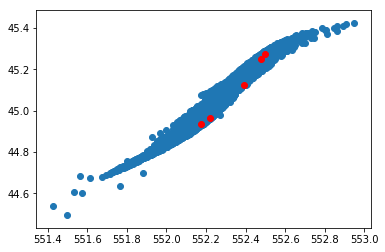

In [37]:
x=tpf.estimate_centroids()[0]
y=tpf.estimate_centroids()[1]

plt.scatter(x,y)
for each in szelsoerteklista:
    plt.scatter(x[each],y[each],c='r')

<IPython.core.display.Javascript object>


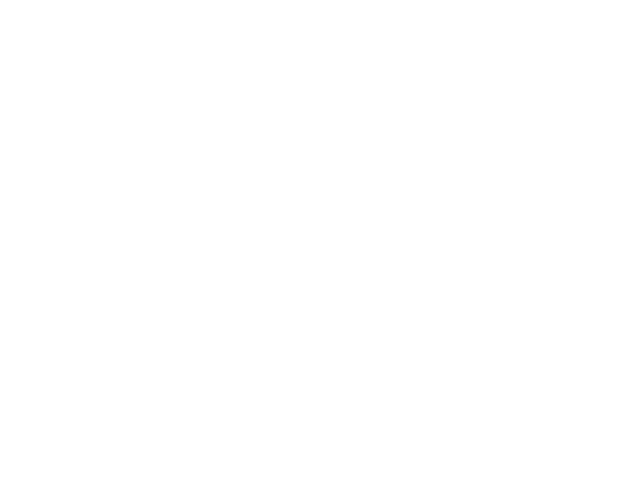

In [38]:
%matplotlib notebook

maxx=np.where(max(x)==x)[0][0]
maxy=np.where(max(y)==y)[0][0]
minx=np.where(min(x)==x)[0][0]
egyikszelso=np.where((44.682<y) & (y<44.6934))[0][0]
masikszelso=np.where((552.747<x) & (x<552.761))[0][0]


ujszelsoerteklista=[egyikszelso,masikszelso]

x=tpf.estimate_centroids()[0]
y=tpf.estimate_centroids()[1]

plt.scatter(x,y)
for each in ujszelsoerteklista:
    plt.scatter(x[each],y[each],c='r')
plt.show()

In [39]:
551.686 551.702 
44.682 44.6934

SyntaxError: invalid syntax (<ipython-input-39-2c22bc3ee807>, line 1)

In [ ]:
552.747 552.761 

##########################################################################################
attilafiles/ktwo212688460-c06_lpd-targ.fits
frame=1343
Szélső érték


/home/pal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in log


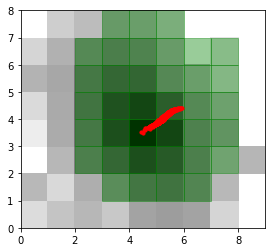

frame=3074
Szélső érték


/home/pal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in log


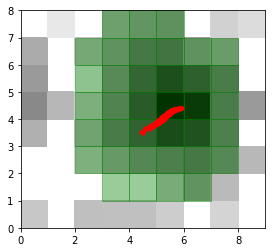

In [40]:


%matplotlib inline
for i, eachtpf in enumerate(tpffilelist):
    
    #if True:
    if i<1:
    
        print('##########################################################################################')
        print(eachtpf)

        
        tpffile=eachtpf
        maskfile=mfilelist[i]

        logfile='thisislogfile'

        kepid, channel, skygroup, module, output, quarter, season, \
        ra, dec, column, row, kepmag, xdim, ydim, pixels = \
        kepio.readTPF(tpffile, 'FLUX', logfile, verbose=True)

        ymin = copy(row)
        ymax = ymin + ydim
        xmin = copy(column)
        xmax = xmin + xdim

        lines = kepio.openascii(maskfile, 'r', None, False)
        for line in lines:
            mask = []
            work = line.strip().split('|')
            y0 = int(work[3])
            x0 = int(work[4])
            work = work[5].split(';')
            for i in range(len(work)):
                n = int(work[i].split(',')[0]) + y0
                m = int(work[i].split(',')[1]) + x0
                mask.append(str(m) + ',' + str(n))

        xcords=[int(each.split(',')[0]) for each in mask]
        ycords=[int(each.split(',')[1]) for each in mask]

        newy=[each-ymin for each in ycords]
        newx=[each-xmin for each in xcords]

        tpf=lightkurve.targetpixelfile.KeplerTargetPixelFile(tpffile)

        inrangeindices=[]
        for ithcord, xcord in enumerate(xcords):
            if xcord>xmin and xcord<xmax:
                if ycords[ithcord]>ymin and ycords[ithcord]<ymax:
                    inrangeindices.append(ithcord)

        newxcords=np.asarray(xcords)[inrangeindices]
        newycords=np.asarray(ycords)[inrangeindices]

        newxcords=[each-xmin for each in newxcords]
        newycords=[each-ymin for each in newycords]            

        grid=np.zeros(tpf.flux[0].shape,dtype=int)

        for index, each in enumerate(newxcords):
            grid[newycords[index]][each]=1



        for eachframe in ujszelsoerteklista:

            print('frame='+str(eachframe))
            if eachframe==2074:
                print('Középső érték')
            else:
                print('Szélső érték')
            
            interval=ZScaleInterval()
            interval=interval.get_limits(tpf.flux[eachframe])
            
            plt.figure()
            #plt.pcolormesh(tpf.flux[eachframe],vmin=interval[0],vmax=interval[1], cmap=cm.gray_r)
            #plt.pcolormesh(tpf.flux[eachframe],vmin=1,vmax=1000, cmap=cm.binary)
            plt.pcolormesh(np.log(tpf.flux[eachframe]), cmap=cm.binary)
            ax=plt.gca()
            ax.set_aspect('equal')
            aperture_mask=grid
            mask_color='green'
            for i in range(tpf.shape[1]):
                for j in range(tpf.shape[2]):
                    if aperture_mask[i, j]:
                        ax.add_patch(patches.Rectangle((j, i),
                                                           1, 1, color=mask_color, fill=True,
                                                           alpha=.40))  

            plt.scatter([each-xmin for each in tpf.estimate_centroids()[0]],[each-ymin for each in tpf.estimate_centroids()[1]],s=10,c='r',zorder=10)
            plt.show()



In [63]:
stars=[glob.glob('attilafiles/ktwo*212688460*lpd-targ.fits')+
glob.glob('attilafiles/ktwo*212789806*lpd-targ.fits')+
glob.glob('attilafiles/ktwo*212801866*lpd-targ.fits')]
stars=stars[0]
mfilelist=[each[:-5]+'.kepmask' for each in stars]

In [64]:
egyikszelso

1343

In [65]:
masikszelso

3074

##########################################################################################
attilafiles/ktwo212688460-c06_lpd-targ.fits
frame=1343
Szélső érték


/home/pal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in log


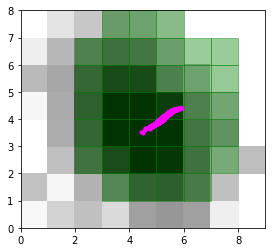

frame=3074
Szélső érték


/home/pal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in log


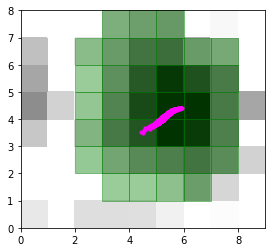

##########################################################################################
attilafiles/ktwo212789806-c06_lpd-targ.fits
frame=1343
Szélső érték


/home/pal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in log


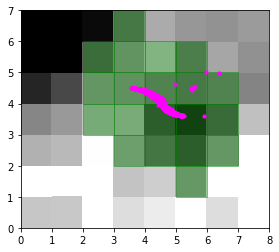

frame=3074
Szélső érték


/home/pal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in log


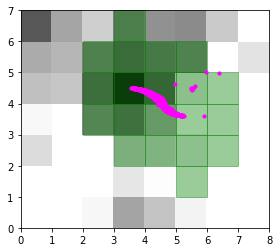

##########################################################################################
attilafiles/ktwo212801866-c06_lpd-targ.fits
frame=1343
Szélső érték


/home/pal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in log


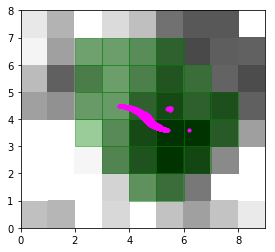

frame=3074
Szélső érték


/home/pal/.local/lib/python3.6/site-packages/ipykernel_launcher.py:78: RuntimeWarning: invalid value encountered in log


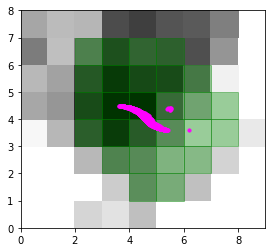

In [84]:
%matplotlib inline
for i, eachtpf in enumerate(stars):
    
    if True:
    #if i<1:
    
        print('##########################################################################################')
        print(eachtpf)

        
        tpffile=eachtpf
        maskfile=mfilelist[i]

        logfile='thisislogfile'

        kepid, channel, skygroup, module, output, quarter, season, \
        ra, dec, column, row, kepmag, xdim, ydim, pixels = \
        kepio.readTPF(tpffile, 'FLUX', logfile, verbose=True)

        ymin = copy(row)
        ymax = ymin + ydim
        xmin = copy(column)
        xmax = xmin + xdim

        lines = kepio.openascii(maskfile, 'r', None, False)
        for line in lines:
            mask = []
            work = line.strip().split('|')
            y0 = int(work[3])
            x0 = int(work[4])
            work = work[5].split(';')
            for i in range(len(work)):
                n = int(work[i].split(',')[0]) + y0
                m = int(work[i].split(',')[1]) + x0
                mask.append(str(m) + ',' + str(n))

        xcords=[int(each.split(',')[0]) for each in mask]
        ycords=[int(each.split(',')[1]) for each in mask]

        newy=[each-ymin for each in ycords]
        newx=[each-xmin for each in xcords]

        tpf=lightkurve.targetpixelfile.KeplerTargetPixelFile(tpffile)

        inrangeindices=[]
        for ithcord, xcord in enumerate(xcords):
            if xcord>xmin and xcord<xmax:
                if ycords[ithcord]>ymin and ycords[ithcord]<ymax:
                    inrangeindices.append(ithcord)

        newxcords=np.asarray(xcords)[inrangeindices]
        newycords=np.asarray(ycords)[inrangeindices]

        newxcords=[each-xmin for each in newxcords]
        newycords=[each-ymin for each in newycords]            

        grid=np.zeros(tpf.flux[0].shape,dtype=int)

        for index, each in enumerate(newxcords):
            grid[newycords[index]][each]=1



        for eachframe in ujszelsoerteklista:

            print('frame='+str(eachframe))
            if eachframe==2074:
                print('Középső érték')
            else:
                print('Szélső érték')
            
            interval=ZScaleInterval()
            interval=interval.get_limits(tpf.flux[eachframe])
            
            plt.figure()
            #plt.pcolormesh(tpf.flux[eachframe],vmin=interval[0],vmax=interval[1], cmap=cm.gray_r)
            #plt.pcolormesh(np.log(tpf.flux[eachframe]-np.min(tpf.flux[eachframe])+1),vmin=0,vmax=np.log(1000), cmap=cm.binary)
            plt.pcolormesh(np.log(tpf.flux[eachframe]),vmin=0,vmax=np.log(1000), cmap=cm.binary)
            #plt.pcolormesh(np.log(tpf.flux[eachframe]), cmap=cm.binary)
            ax=plt.gca()
            ax.set_aspect('equal')
            aperture_mask=grid
            mask_color='green'
            for i in range(tpf.shape[1]):
                for j in range(tpf.shape[2]):
                    if aperture_mask[i, j]:
                        ax.add_patch(patches.Rectangle((j, i),
                                                           1, 1, color=mask_color, fill=True,
                                                           alpha=.40))  

            plt.scatter([each-xmin for each in tpf.estimate_centroids()[0]],[each-ymin for each in tpf.estimate_centroids()[1]],s=10,c='magenta',zorder=10)
            
            plt.show()

